In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.dataset.unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [ ]:
df.shape

(920, 16)

In [ ]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
df.corr()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df = df.drop(columns = ["ca", "thal" ])

In [ ]:
df = df.rename(columns = {"dataset": "origin"})

In [ ]:
df

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,0


In [ ]:
df.slope.value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [ ]:
df.exang.value_counts()

False    528
True     337
Name: exang, dtype: int64

In [ ]:
df.fbs.value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [ ]:
df.slope.fillna("flat", inplace=True)

In [ ]:
df.isnull().sum()

id           0
age          0
sex          0
origin       0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
slope        0
num          0
dtype: int64

In [ ]:
df.fbs.value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [ ]:
df.oldpeak.fillna(df.oldpeak.median(), inplace=True)

In [ ]:
df.exang.fillna(df.exang.median(), inplace=True)


In [ ]:
df.thalch.fillna(df.thalch.median(), inplace=True)

In [ ]:
df.restecg.fillna("normal", inplace=True)

In [ ]:
df.fbs.fillna("False", inplace=True)

In [ ]:
df.chol.fillna(df.chol.median(), inplace=True)

In [ ]:
df.trestbps.fillna(df.trestbps.median(), inplace=True)

In [ ]:
df.restecg.mode()

0    normal
dtype: object

In [ ]:
df.isnull().sum()

id          0
age         0
sex         0
origin      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [ ]:
df = df.drop(columns=["id"])

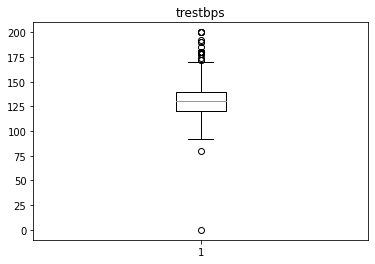

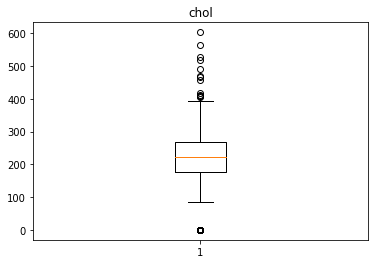

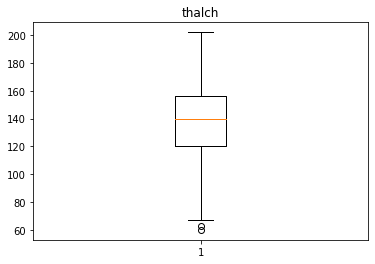

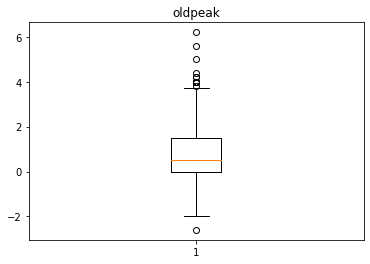

In [ ]:
for i in df.columns:
  if df[i].dtype == "float64":
    plt.subplots()
    plt.boxplot(df[i].values)
    plt.title(i)

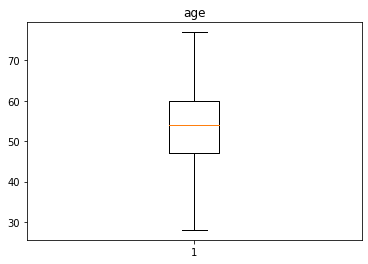

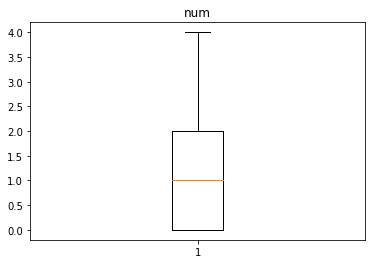

In [ ]:
for j in df.columns:
  if df[j].dtype == "int64":
    plt.subplots()
    plt.boxplot(df[j].values)
    plt.title(j)

In [ ]:
def outliers(var):
    q1 = np.percentile(var, 25, axis=0)
    q3 = np.percentile(var, 75, axis=0)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    up_limit = q3 + 1.5 * iqr
    return df[(var > low_limit) & (var < up_limit)]

In [ ]:
df = outliers(df.trestbps)
df = outliers(df.chol)
df = outliers(df.thalch)
df = outliers(df.oldpeak)

In [ ]:
df.shape

(690, 13)

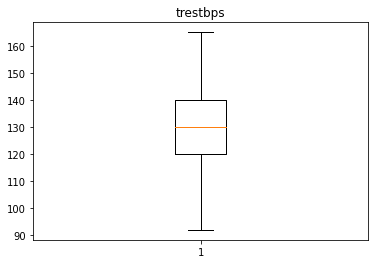

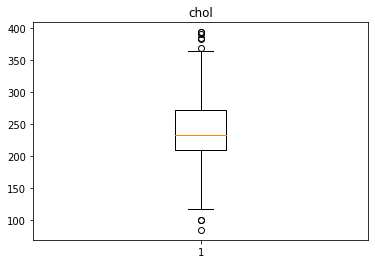

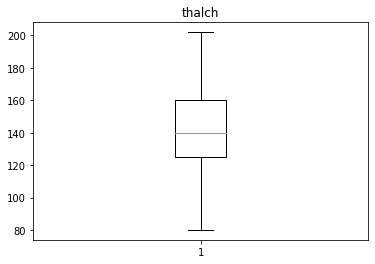

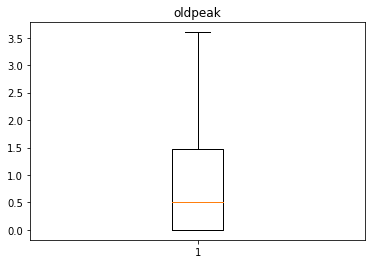

In [ ]:
for m in df.columns:
  if df[m].dtype == "float64":
    plt.subplots()
    plt.boxplot(df[m].values)
    plt.title(m)

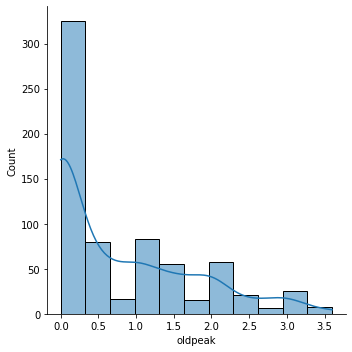

In [ ]:
import seaborn as sns
sns.displot(df.oldpeak, kde=True)

In [ ]:
df["fbs"] = df["fbs"].replace({False:"False", True:"True"})

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["sex"] = le.fit_transform(df[["sex"]])
df["cp"] = le.fit_transform(df[["cp"]])
df["fbs"] = le.fit_transform(df[["fbs"]])
df["restecg"] = le.fit_transform(df[["restecg"]])
df["slope"] = le.fit_transform(df[["slope"]])
df["exang"] = le.fit_transform(df[["exang"]])
df["origin"] = le.fit_transform(df[["origin"]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.origin.nunique()

3

In [ ]:
df.head()

,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0
1,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,2
2,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,1
3,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0
4,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0


In [ ]:
df["num"].value_counts()

0    375
1    184
3     60
2     56
4     15
Name: num, dtype: int64

In [ ]:
x = df.drop(columns=["num"])
y = df["num"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.75, random_state = 22)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = LR.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

0.5838150289017341

In [ ]:
classification_report(y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.69      0.88      0.77        88\n           1       0.40      0.43      0.42        51\n           2       0.20      0.09      0.13        11\n           3       0.50      0.06      0.10        18\n           4       0.00      0.00      0.00         5\n\n    accuracy                           0.58       173\n   macro avg       0.36      0.29      0.28       173\nweighted avg       0.54      0.58      0.53       173\n'

In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[77, 11,  0,  0,  0],
       [28, 22,  0,  1,  0],
       [ 2,  8,  1,  0,  0],
       [ 3, 11,  3,  1,  0],
       [ 1,  3,  1,  0,  0]])

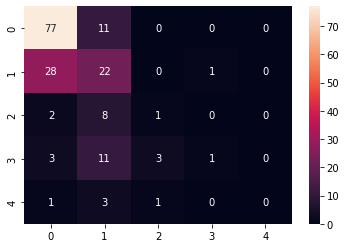

In [ ]:
sns.heatmap(con_mat, annot=True)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_smote , y_smote = smote.fit_resample(x_scaled,  y)

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.25, random_state=22)

In [ ]:
from collections import Counter
print("Before smote", Counter(y_train))
print("After smote", Counter(y_train_sm))

Before smote Counter({0: 287, 1: 133, 2: 45, 3: 42, 4: 10})
After smote Counter({1: 294, 3: 282, 4: 279, 2: 277, 0: 274})


In [ ]:
LogR = LogisticRegression()
LogR.fit(X_train_sm, y_train_sm)
pred_y_smote = LogR.predict(X_test_sm)

In [ ]:
accuracy_score(y_test_sm, pred_y_smote)

0.5565031982942431

In [ ]:
print(classification_report(y_test_sm, pred_y_smote))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75       101
           1       0.42      0.43      0.42        81
           2       0.46      0.40      0.43        98
           3       0.48      0.32      0.38        93
           4       0.62      0.79      0.70        96

    accuracy                           0.56       469
   macro avg       0.54      0.55      0.54       469
weighted avg       0.54      0.56      0.54       469



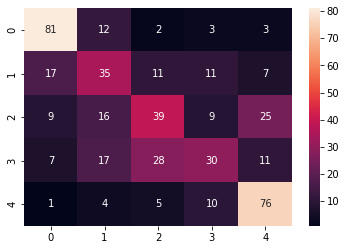

In [ ]:
corr_smote = confusion_matrix(y_test_sm, pred_y_smote)
sns.heatmap(corr_smote, annot=True)
plt.show()